# HR Analaytics - Attition Prediction

In [4]:
#Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
import plotly.graph_objs as go
import plotly.offline as py

In [5]:
#Import the raw dataset
raw_df = pd.read_csv("D:\Sandeep- DSDJ\python docs\WA_Fn-UseC_-HR-Employee-Attrition.csv")

## Begin Exploratory Data Analysis

In [6]:
# Let us know look at the few data columns
print(raw_df.head(10))


   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   
5   32        No  Travel_Frequently       1005  Research & Development   
6   59        No      Travel_Rarely       1324  Research & Development   
7   30        No      Travel_Rarely       1358  Research & Development   
8   38        No  Travel_Frequently        216  Research & Development   
9   36        No      Travel_Rarely       1299  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8      

In [7]:
# Now, let us see the data_types of our columns
print(raw_df.describe())

               Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335            

In [8]:
# Now we have to see if we have "null" valued columns
print(raw_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [9]:
# Dataquality check
print( raw_df.isnull().any())
clean_df = raw_df.drop_duplicates(subset='EmployeeNumber')

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

In [10]:
# Check for employee count
print(clean_df.shape)

(1470, 35)


In [11]:
# Calculating the attrition rate
attrition_rate = clean_df.Attrition.value_counts() / 1470
print("The attrition % is:", attrition_rate['Yes'] * 100)

The attrition % is: 16.1224489796


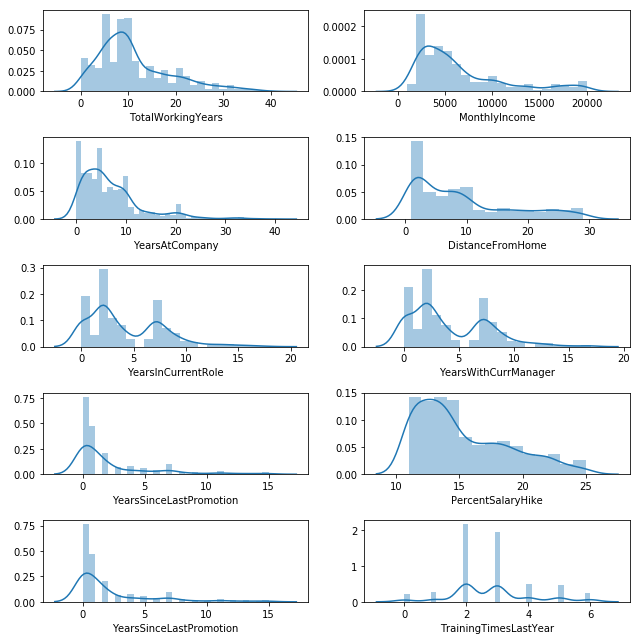

In [12]:
# Let do some Data Visualizations to get better understanding of our data
#Visualizing feature set
fig, ax = plt.subplots(5, 2, figsize=(9, 9))
sns.distplot(clean_df['TotalWorkingYears'], ax=ax[0, 0])
sns.distplot(clean_df['MonthlyIncome'], ax=ax[0, 1])
sns.distplot(clean_df['YearsAtCompany'], ax=ax[1, 0])
sns.distplot(clean_df['DistanceFromHome'], ax=ax[1, 1])
sns.distplot(clean_df['YearsInCurrentRole'], ax=ax[2, 0])
sns.distplot(clean_df['YearsWithCurrManager'], ax=ax[2, 1])
sns.distplot(clean_df['YearsSinceLastPromotion'], ax=ax[3, 0])
sns.distplot(clean_df['PercentSalaryHike'], ax=ax[3, 1])
sns.distplot(clean_df['YearsSinceLastPromotion'], ax=ax[4, 0])
sns.distplot(clean_df['TrainingTimesLastYear'], ax=ax[4, 1])
plt.tight_layout()
plt.show()

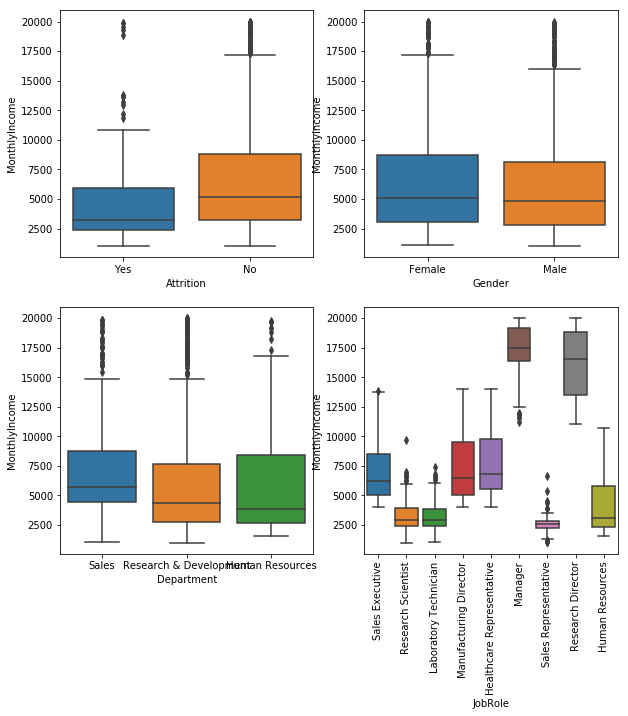

In [13]:
#Compare a few feature values to see the relationships
fig, ax = plt.subplots(2, 2, figsize=(10, 10))  # 'ax' has references to all the four axes
sns.boxplot(clean_df['Attrition'], clean_df['MonthlyIncome'], ax=ax[0, 0])  # Plot on 1st axes
sns.boxplot(clean_df['Gender'], clean_df['MonthlyIncome'], ax=ax[0, 1])  # Plot on IInd axes
plt.xticks(rotation=90)
sns.boxplot(clean_df['Department'], clean_df['MonthlyIncome'], ax=ax[1, 0])  # Plot on IIIrd axes
plt.xticks(rotation=90)

sns.boxplot(clean_df['JobRole'], clean_df['MonthlyIncome'], ax=ax[1, 1])  # Plot on IV the axes
plt.show()

continuous = ['Attrition', 'Age', 'MonthlyIncome', 'JobLevel', 'TotalWorkingYears', 'PercentSalaryHike',
              'PerformanceRating']

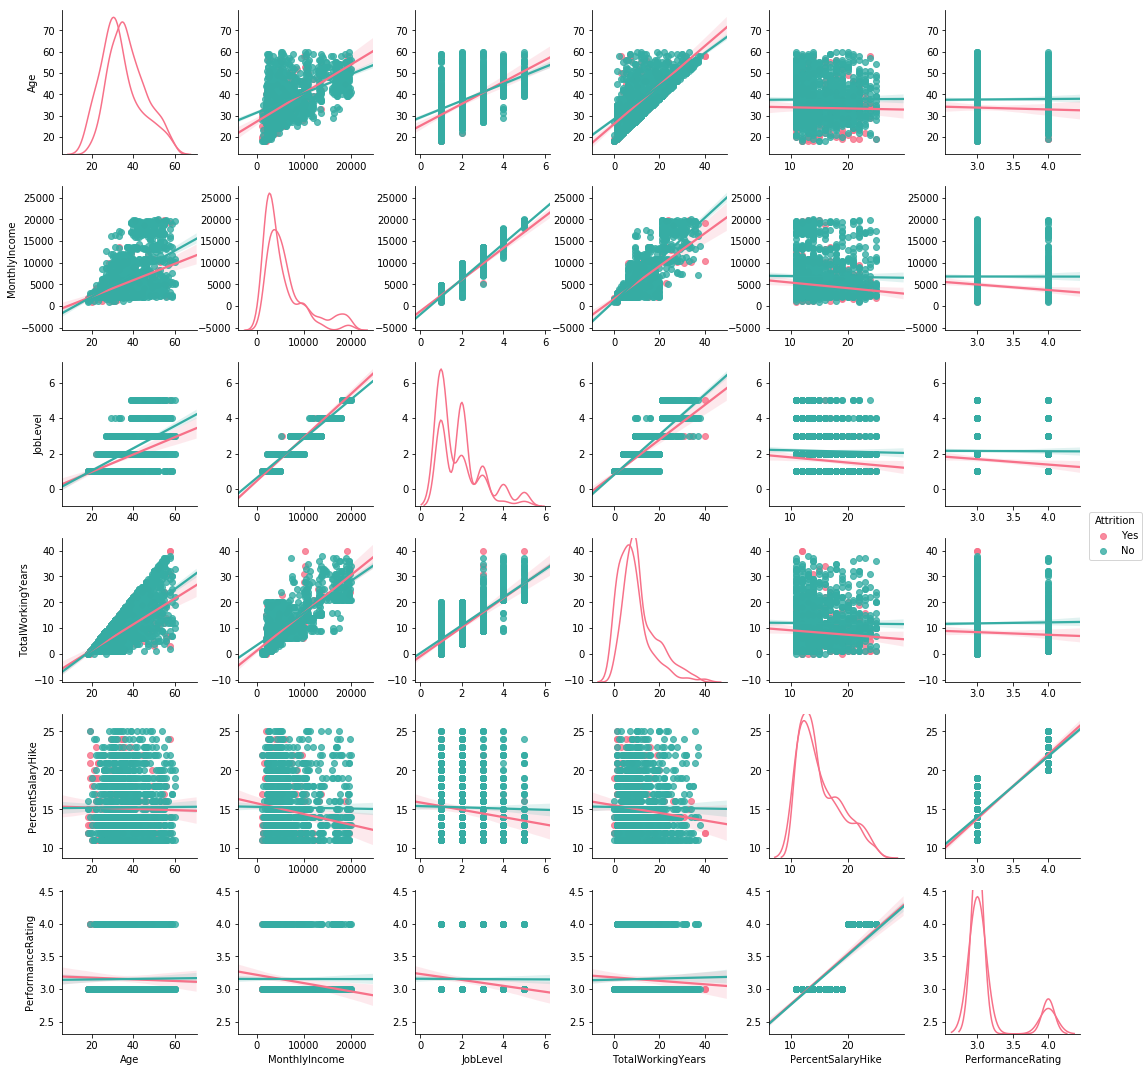

In [15]:
#Visualizing numerical variables with attrition
sns.pairplot(clean_df[continuous],  kind="reg", diag_kind = "kde"  , hue = 'Attrition', palette="husl" )
plt.show()

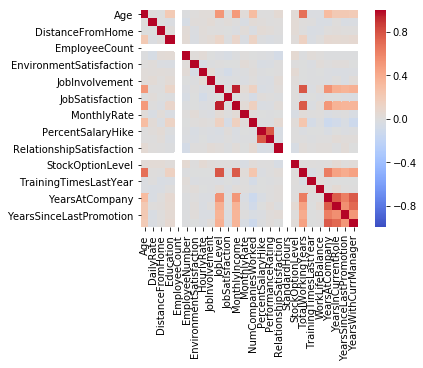

In [21]:
#Visualizing a correlation matrix
corr = clean_df.corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap='coolwarm',
    square=True
)

plt.show()

## Building a Model

In [24]:
# Let us convert the attrition (target variable) to numeric
# Define a dictionary for the target label
label = {'Yes': 1, 'No': 0}

# Use the pandas apply method to numerically encode our attrition target variable
clean_df["Attrition_num"] = clean_df["Attrition"].apply(lambda x: label[x])
target_df = clean_df["Attrition_num"]

In [25]:
# Let us seperate our categorical data
categorical = []
for col, value in clean_df.iteritems():
    if value.dtype == 'object':
        categorical.append(col)
        categorical_df = clean_df[categorical]
categorical_df = categorical_df.drop('Attrition', axis=1) #Drop attrition as it is our target variable
categorical_df = pd.get_dummies(categorical_df) #onehot encoding categorical variables
print(categorical_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1469
Data columns (total 29 columns):
BusinessTravel_Non-Travel            1470 non-null uint8
BusinessTravel_Travel_Frequently     1470 non-null uint8
BusinessTravel_Travel_Rarely         1470 non-null uint8
Department_Human Resources           1470 non-null uint8
Department_Research & Development    1470 non-null uint8
Department_Sales                     1470 non-null uint8
EducationField_Human Resources       1470 non-null uint8
EducationField_Life Sciences         1470 non-null uint8
EducationField_Marketing             1470 non-null uint8
EducationField_Medical               1470 non-null uint8
EducationField_Other                 1470 non-null uint8
EducationField_Technical Degree      1470 non-null uint8
Gender_Female                        1470 non-null uint8
Gender_Male                          1470 non-null uint8
JobRole_Healthcare Representative    1470 non-null uint8
JobRole_Human Resources              1

In [26]:
# Seperating our numerical variables
numerical = clean_df.columns.difference(categorical)
numerical_df = clean_df[numerical]
numerical_df = numerical_df.drop('Attrition_num', axis=1)
print( numerical_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1469
Data columns (total 26 columns):
Age                         1470 non-null int64
DailyRate                   1470 non-null int64
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobSatisfaction             1470 non-null int64
MonthlyIncome               1470 non-null int64
MonthlyRate                 1470 non-null int64
NumCompaniesWorked          1470 non-null int64
PercentSalaryHike           1470 non-null int64
PerformanceRating           1470 non-null int64
RelationshipSatisfaction    1470 non-null int64
StandardHours               1470 non-null int64
StockOptionLevel            1

In [27]:
# Let us now create our final_df
final_df = pd.concat([categorical_df, numerical_df], axis=1)

In [ ]:
#Let us now visualize our target df
sns.countplot(target_df)
plt.show()


We can clearly spot a data imbalance

In [30]:
# Split feature and target df into train,test data sets
X_train, X_Test, y_train, Y_Test = train_test_split(final_df, target_df, test_size=0.2, random_state=42)
# As we can see we have an imbalance data set, we need to do sampling inorder to overcome this

In [31]:
# As we can see we have an imbalance data set, we need to do sampling inorder to overcome this

# Upsample using SMOTE to treat our imbalance dataset
sm = SMOTE(random_state=12)
x_train_sm, y_train_sm = sm.fit_sample(X_train, y_train)

Let us train three models and see which model performs the best
Fit the models to the Upsampled data

In [35]:
#LOGISTIC_REGRESSION
lr = LogisticRegression()

# Fit the model to the Upsampling data
lr = lr.fit(x_train_sm, y_train_sm)

print ("\n\n ---Logistic Regression Model---")
lr_auc = roc_auc_score(Y_Test, lr.predict(X_Test))

print ("Logistic Regression AUC = %2.2f" % lr_auc)

lr2 = lr.fit(x_train_sm, y_train_sm)
print(classification_report(Y_Test, lr.predict(X_Test)))



 ---Logistic Regression Model---
Logistic Regression AUC = 0.66
              precision    recall  f1-score   support

           0       0.92      0.70      0.79       255
           1       0.24      0.62      0.34        39

    accuracy                           0.69       294
   macro avg       0.58      0.66      0.57       294
weighted avg       0.83      0.69      0.73       294



C:\Users\sandh\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\sandh\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [36]:
# Random Forest Model
rf = RandomForestClassifier()

#Applying 5-vold cross validation
rf_result = cross_val_score(rf, x_train_sm, y_train_sm, cv=5, scoring='f1')

rf_result.mean()


0.87189274240962433

In [38]:
rf = rf.fit(x_train_sm, y_train_sm)

print ("\n\n ---Random Forest Model---")
rf_roc_auc = roc_auc_score(Y_Test, rf.predict(X_Test))
print ("Random Forest AUC = %2.2f" % rf_roc_auc)
print(classification_report(Y_Test, rf.predict(X_Test)))



 ---Random Forest Model---
Random Forest AUC = 0.61
              precision    recall  f1-score   support

           0       0.89      0.98      0.94       255
           1       0.69      0.23      0.35        39

    accuracy                           0.88       294
   macro avg       0.79      0.61      0.64       294
weighted avg       0.87      0.88      0.86       294



In [39]:
#Gradient Boosting
gbc = GradientBoostingClassifier()  

gbc = gbc.fit(x_train_sm,y_train_sm)

In [40]:
#Applying 5-fold crossvalidation
gbc_result = cross_val_score(gbc, x_train_sm, y_train_sm, cv=5, scoring='f1')
gbc_result.mean()

0.80401929403930672

In [42]:
print ("\n\n ---Gradient Boosting Model---")
gbc_auc = roc_auc_score(Y_Test, gbc.predict(X_Test))
print ("Gradient Boosting Classifier AUC = %2.2f" % gbc_auc)
print(classification_report(Y_Test, gbc.predict(X_Test)))



 ---Gradient Boosting Model---
Gradient Boosting Classifier AUC = 0.66
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       255
           1       0.56      0.36      0.44        39

    accuracy                           0.88       294
   macro avg       0.73      0.66      0.68       294
weighted avg       0.86      0.88      0.87       294



I would go with Random Forest here as it provides better generalization

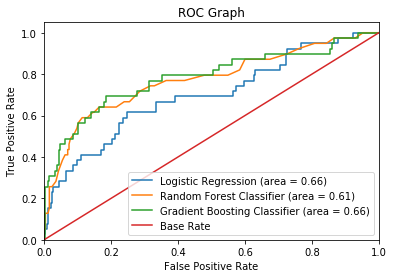

In [43]:
# Create ROC Graph
from sklearn.metrics import roc_curve
lr_fpr, lr_tpr, thresholds = roc_curve(Y_Test, lr.predict_proba(X_Test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(Y_Test, rf.predict_proba(X_Test)[:,1])
gbc_fpr, gbc_tpr, gbc_thresholds = roc_curve(Y_Test, gbc.predict_proba(X_Test)[:,1])


plt.figure()

# Plot Logistic Regression ROC
plt.plot(lr_fpr, lr_tpr, label='Logistic Regression (area = %0.2f)' % lr_auc)

# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest Classifier (area = %0.2f)' % rf_roc_auc)

# Plot Decision Tree ROC
plt.plot(gbc_fpr, gbc_tpr, label='Gradient Boosting Classifier (area = %0.2f)' % gbc_auc)

# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

In [57]:
# Confusion Matrix for Linear Regresion
confusion_matrix(Y_Test, lr.predict(X_Test))

array([[178,  77],
       [ 15,  24]], dtype=int64)

In [58]:
# Confusion Matrix for Random Forest
confusion_matrix(Y_Test, rf.predict(X_Test))

array([[251,   4],
       [ 30,   9]], dtype=int64)

In [59]:
# Confusion Matrix for Gradient Boosting
confusion_matrix(Y_Test, gbc.predict(X_Test))

array([[244,  11],
       [ 25,  14]], dtype=int64)

It depends on how much cost/weight you want on your two types of errors: (1) False Positives or (2) False Negatives

What's the coset of having a FN and FP?

Optimize Recall When:

You want to limit false negatives
You will get more False Positives
FN > FP
Example: Predicting Cancer Patients or Credit Card Fraud

Optimize Precision When:
You want to limit false positives
FP > FN
Example: Spam VS Not Spam

In [53]:

feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = x_train_sm.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances = feature_importances.reset_index()
feature_importances


,index,importance
0,OverTime_No,0.123175
1,StockOptionLevel,0.059916
2,MonthlyIncome,0.053269
3,JobSatisfaction,0.039633
4,JobLevel,0.034314
5,Department_Research & Development,0.034274
6,YearsInCurrentRole,0.031338
7,JobInvolvement,0.030499
8,Age,0.029639
9,TotalWorkingYears,0.029175


Conclusion:
Based on how we want to optimize recall or precision, management level decisions will be made. Management decisions can be made to optimize features like employee work life balance, overtime etc to decrease the attrition rate. Implementing Yoga or Stress Management courses can also help achieve job saticifaction.